In [2]:
using Pkg
Pkg.activate("../../..")

  Activating project at `~/Documents/Git/StockFlow.jl`


In [3]:
using StockFlow
using StockFlow.Syntax

# Causal Loop F Syntax

In [4]:
cl1 = @causal_loop begin
  :nodes
  A
  B
  C
  D
  E
  F

  :edges
  A => +B
  B => -C
  C => !D
  D => ~E
  E => ±A

end

CausalLoopF {E:5, N:6, Name:0, Polarity:0}
┌───┬───┬───┬──────────────────────┐
│ E │ s │ t │            epolarity │
├───┼───┼───┼──────────────────────┤
│ 1 │ 1 │ 2 │      POL_REINFORCING │
│ 2 │ 2 │ 3 │        POL_BALANCING │
│ 3 │ 3 │ 4 │             POL_ZERO │
│ 4 │ 4 │ 5 │          POL_UNKNOWN │
│ 5 │ 5 │ 1 │ POL_NOT_WELL_DEFINED │
└───┴───┴───┴──────────────────────┘
┌───┬───────┐
│ N │ nname │
├───┼───────┤
│ 1 │     A │
│ 2 │     B │
│ 3 │     C │
│ 4 │     D │
│ 5 │     E │
│ 6 │     F │
└───┴───────┘

# Compressed Syntax

In [5]:
cl2 = (@cl A => +B, B => -C, C => !D, D => ~E, E => ±A, F)

CausalLoopF {E:5, N:6, Name:0, Polarity:0}
┌───┬───┬───┬──────────────────────┐
│ E │ s │ t │            epolarity │
├───┼───┼───┼──────────────────────┤
│ 1 │ 1 │ 2 │      POL_REINFORCING │
│ 2 │ 2 │ 3 │        POL_BALANCING │
│ 3 │ 3 │ 4 │             POL_ZERO │
│ 4 │ 4 │ 5 │          POL_UNKNOWN │
│ 5 │ 5 │ 1 │ POL_NOT_WELL_DEFINED │
└───┴───┴───┴──────────────────────┘
┌───┬───────┐
│ N │ nname │
├───┼───────┤
│ 1 │     A │
│ 2 │     B │
│ 3 │     C │
│ 4 │     D │
│ 5 │     E │
│ 6 │     F │
└───┴───────┘

In [6]:
cl1 == cl2

true

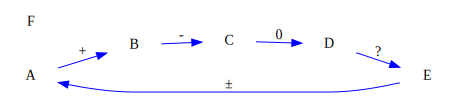

In [7]:
GraphSF(cl1)

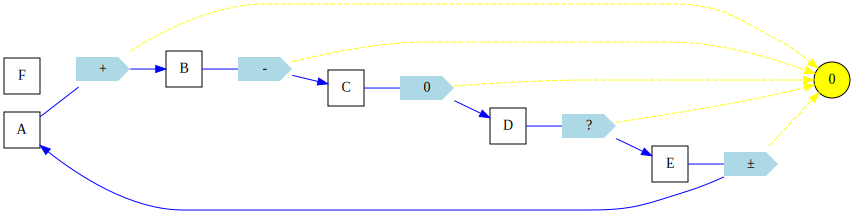

In [8]:
# Because there is a zero on the loop, there is an overall 0 relationship with the whole loop
Graph_RB(cl1)

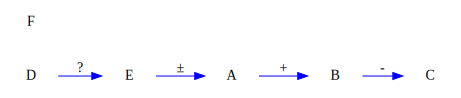

In [9]:
# Removes all edges with polarity 0
GraphSF(discard_zero_pol(cl1))